Шаг 1 — Импортируем необходимые библиотеки и настраиваем среду для отображения графиков.

In [20]:
# Импортируем необходимые библиотеки
import pandas as pd       # Для работы с DataFrame
import numpy as np        # Для работы с массивами и числовыми операциями
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns     # Для статистической визуализации данных

# Настраиваем inline-режим для отображения графиков внутри Jupyter Notebook
%matplotlib inline

Шаг 2 — Загружаем данные из файла Ecommerce Customers.csv и сохраняем их в DataFrame под именем customers.

In [21]:
# Загружаем данные
customers = pd.read_csv('Ecommerce Customers.csv')

# Проверяем, что данные загружены корректно, выводя первые строки
customers.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Шаг 3 — Изучаем основные сведения о данных с помощью функций info() и describe().


In [22]:
# Получаем информацию о типах данных и отсутствии значений
customers.info()

# Статистическое описание числовых колонок
customers.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Шаг 4 — Создаем график совместного распределения (jointplot) для сравнения колонок Time on Website и Yearly Amount Spent, чтобы посмотреть, есть ли между ними корреляция.

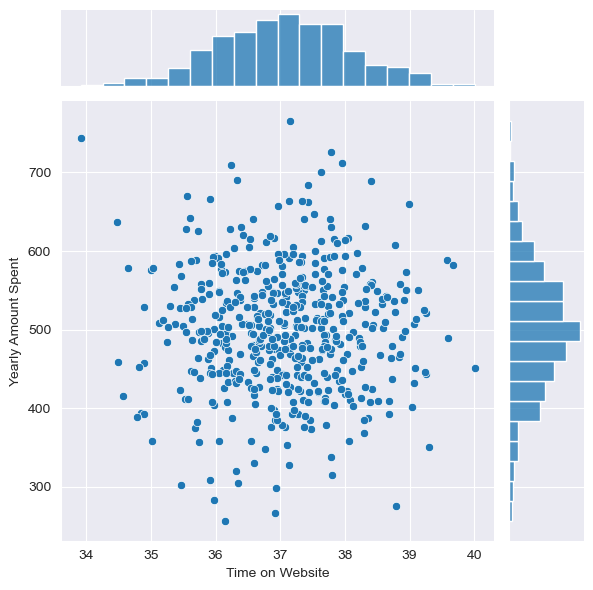

In [23]:
# Построение графика совместного распределения для Time on Website и Yearly Amount Spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)
plt.show()


Шаг 5 — Создаем двухмерный график (jointplot) для сравнения колонок Time on App и Length of Membership с использованием гексагональной сетки (hex plot).

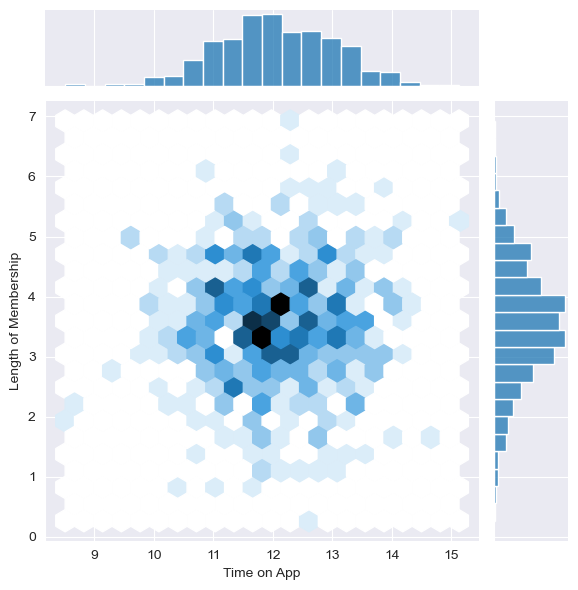

In [24]:
# Построение 2D-графика для Time on App и Length of Membership
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')
plt.show()


Шаг 6 — Исследуем взаимосвязи между всеми числовыми признаками в наборе данных с помощью диаграммы pairplot.

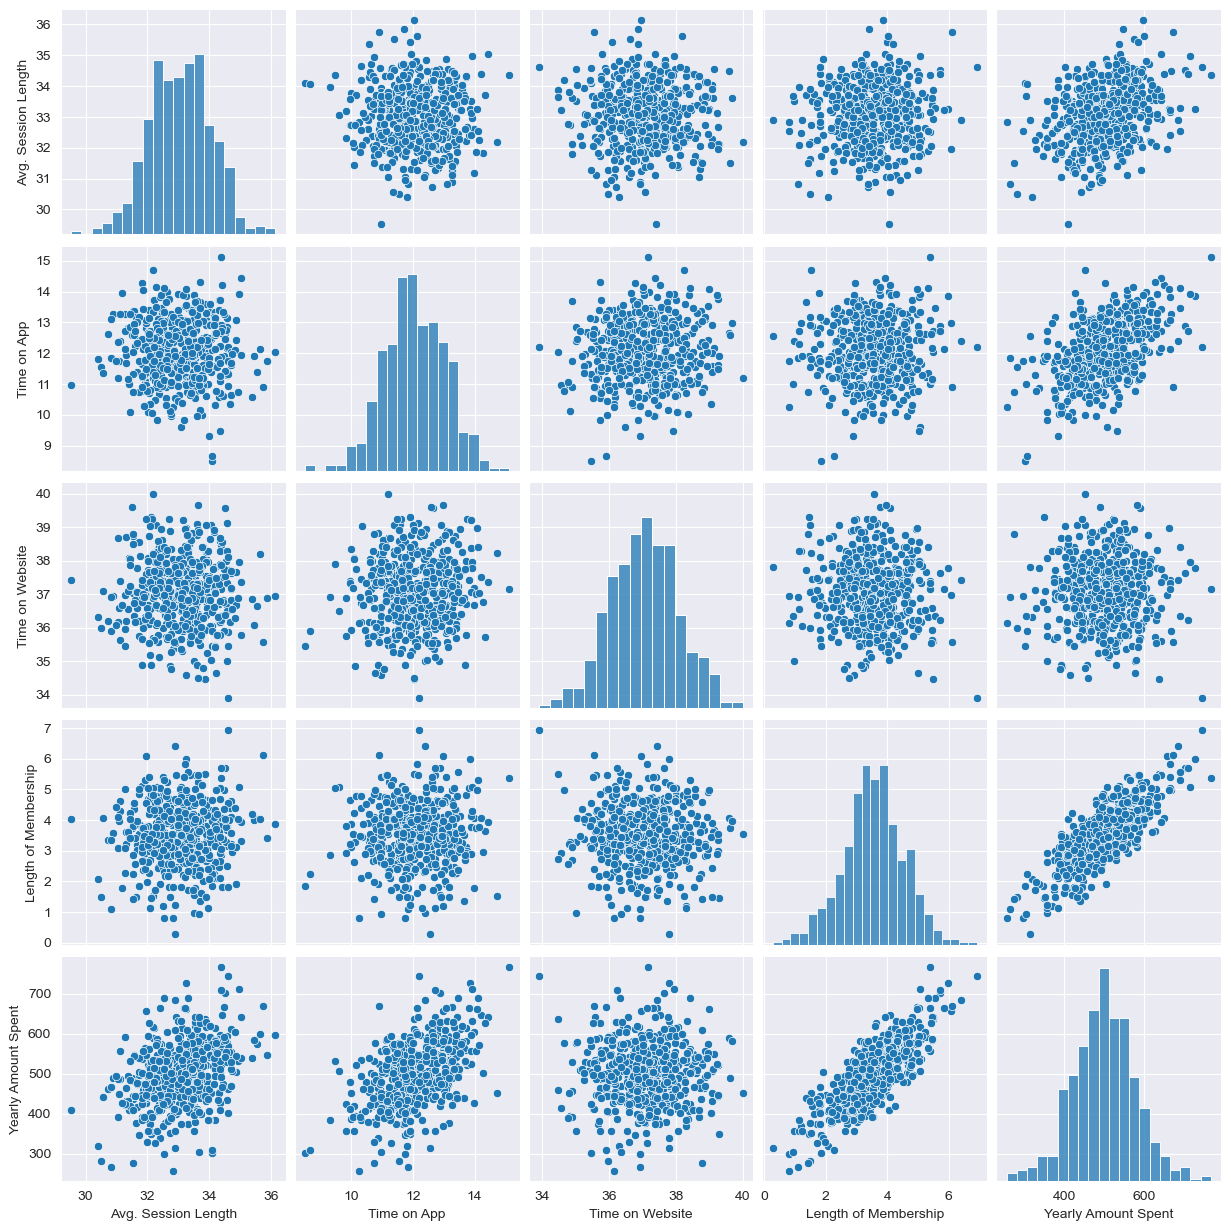

In [25]:
# Построение pairplot для всех числовых данных
sns.pairplot(customers)
plt.show()

Шаг 7 — Строим график линейной регрессии, чтобы увидеть зависимость между Yearly Amount Spent и Length of Membership.

In [26]:
# Построение линейной регрессии для Yearly Amount Spent и Length of Membership
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)


Шаг 8 — Задаем переменные для моделей. Переменная X будет содержать числовые признаки клиентов, а переменная y — столбец Yearly Amount Spent.

In [27]:
# Импортируем функцию для разделения данных
from sklearn.model_selection import train_test_split

# Определяем переменные X и y
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


Шаг 9 — Используем модель линейной регрессии для обучения на данных и предсказания на тестовой выборке.

In [28]:
# Импортируем модель линейной регрессии
from sklearn.linear_model import LinearRegression

# Создаем экземпляр модели линейной регрессии
lm = LinearRegression()

# Обучаем модель на обучающих данных
lm.fit(X_train, y_train)

# Прогнозируем значения на тестовых данных
y_pred = lm.predict(X_test)


Шаг 10 — Напечатаем коэффициенты модели линейной регрессии, чтобы понять, как каждый признак влияет на предсказанную величину.

In [29]:
# Выводим коэффициенты модели
print(f'Коэффициенты модели: {lm.coef_}')
print(f'Перехват модели (intercept): {lm.intercept_}')


Коэффициенты модели: [25.98154972 38.59015875  0.19040528 61.27909654]
Перехват модели (intercept): -1047.932782250239


Шаг 11 — Создаем экземпляр модели линейной регрессии и обучаем её на тренировочных данных. Этот шаг уже был частично выполнен в шаге 9, но давайте более детально разберем его:

In [30]:
# Создаем экземпляр модели линейной регрессии
lm = LinearRegression()

# Обучаем модель на тренировочных данных
lm.fit(X_train, y_train)


LinearRegression()

Шаг 15 — Создаем диаграмму рассеяния для сравнения реальных значений и предсказанных значений.

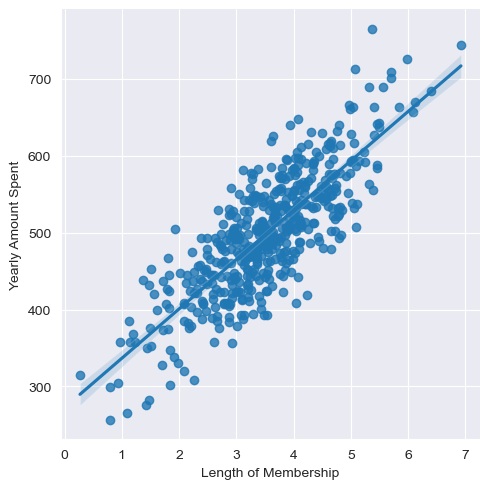

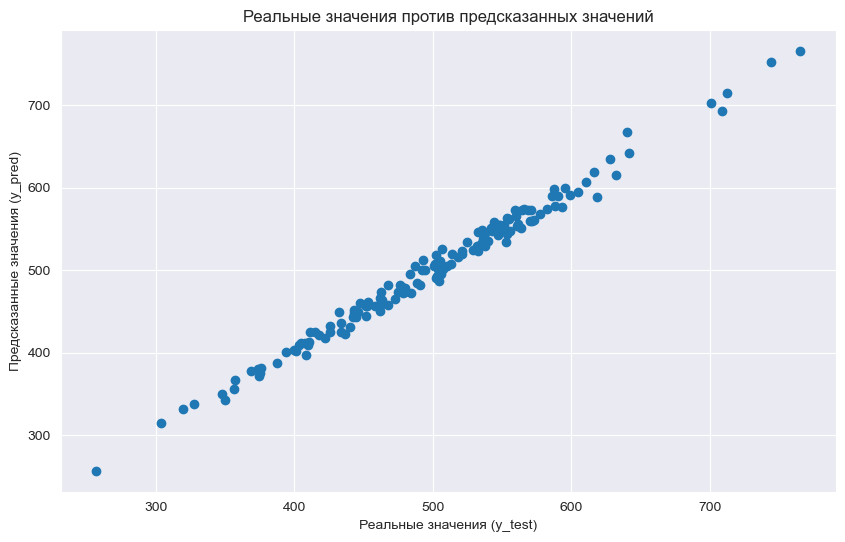

In [31]:
import matplotlib.pyplot as plt

# Создаем диаграмму рассеяния реальных значений против предсказанных
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

# Добавляем заголовки и метки
plt.title('Реальные значения против предсказанных значений')
plt.xlabel('Реальные значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')

# Показываем график
plt.show()


Шаг 16 — Оценка производительности модели с помощью вычисления различных ошибок: средней абсолютной ошибки (MAE), средней квадратичной ошибки (MSE) и корня из средней квадратичной ошибки (RMSE).

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Вычисляем MAE (среднюю абсолютную ошибку)
mae = mean_absolute_error(y_test, y_pred)

# Вычисляем MSE (среднюю квадратичную ошибку)
mse = mean_squared_error(y_test, y_pred)

# Вычисляем RMSE (квадратный корень из средней квадратичной ошибки)
rmse = np.sqrt(mse)

# Выводим результаты
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 7.2281486534308295
MSE: 79.8130516509744
RMSE: 8.933815066978632


Шаг 17 — Анализируем остатки (резидуа) модели, чтобы убедиться, что они распределены нормально. Это важно для проверки того, насколько хорошо модель соответствует данным.

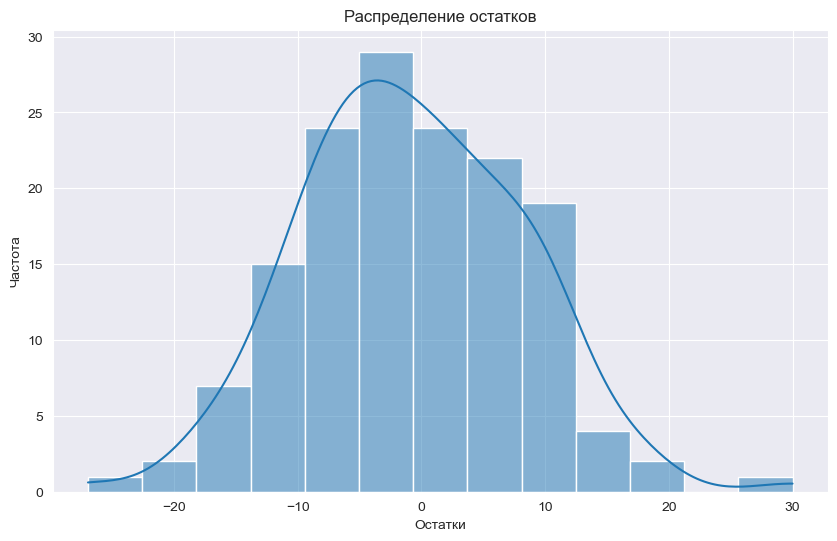

In [33]:
# Вычисляем остатки (разницу между реальными и предсказанными значениями)
residuals = y_test - y_pred

# Строим гистограмму остатков
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)  # kde=True для добавления кривой плотности
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()


Шаг 18 — Реконструируем набор данных, чтобы проанализировать коэффициенты модели и понять, какие переменные наиболее влияют на предсказания.

In [34]:
# Создаем DataFrame с коэффициентами
coefficients = pd.DataFrame(lm.coef_, X_train.columns, columns=['Коэффициенты'])
coefficients['Переменная'] = X_train.columns
coefficients = coefficients[['Переменная', 'Коэффициенты']]

# Выводим коэффициенты
print(coefficients)


                                Переменная  Коэффициенты
Avg. Session Length    Avg. Session Length     25.981550
Time on App                    Time on App     38.590159
Time on Website            Time on Website      0.190405
Length of Membership  Length of Membership     61.279097


Шаг 19 — Интерпретация коэффициентов модели.


На этом шаге важно проанализировать полученные коэффициенты модели, чтобы понять, как каждая из характеристик влияет на предсказание целевой переменной (в данном случае **Yearly Amount Spent**).

### Как интерпретировать коэффициенты:
- **Положительный коэффициент** означает, что увеличение значения соответствующего признака ведет к увеличению предсказанного значения **Yearly Amount Spent**.
- **Отрицательный коэффициент** означает, что увеличение значения признака приведет к уменьшению предсказанного значения **Yearly Amount Spent**.
- **Размер коэффициента** отражает степень влияния признака. Чем больше абсолютное значение коэффициента, тем сильнее влияние признака на целевую переменную.

### Пример интерпретации:
Предположим, что у нас есть следующие коэффициенты:

| Переменная             | Коэффициент  |
|------------------------|-------------|
| Time on App            | 0.2         |
| Time on Website        | 0.1         |
| Length of Membership    | 1.5         |

1. **Time on App (0.2)**: Если клиент проводит 1 дополнительную минуту в приложении, сумма, потраченная им за год, увеличивается на 0.2 условных единиц.
2. **Time on Website (0.1)**: Если клиент проводит 1 дополнительную минуту на сайте, сумма, потраченная им за год, увеличивается на 0.1 условных единиц.
3. **Length of Membership (1.5)**: Каждый дополнительный год членства клиента увеличивает сумму, потраченную им за год, на 1.5 условных единицы.

Из этого можно сделать вывод, что переменная **Length of Membership** имеет наибольшее влияние на **Yearly Amount Spent**, поскольку ее коэффициент самый большой. Это может означать, что для данной компании долгосрочные клиенты тратят гораздо больше денег по сравнению с новыми.

### Важное замечание:
Если значения коэффициентов кажутся неполными или трудными для интерпретации, стоит рассмотреть возможность использования нормализации или стандартизации данных. Это позволит улучшить интерпретацию значений коэффициентов, особенно если признаки имеют различные масштабы.

Шаг 20 — Ответ на вопрос: **Стоит ли компании сосредоточиться на мобильном приложении или на веб-сайте?**

Для ответа на этот вопрос, мы должны внимательно проанализировать коэффициенты модели и их влияние на целевую переменную **Yearly Amount Spent**. Вопрос состоит в том, какой канал — мобильное приложение или веб-сайт — оказывает большее влияние на поведение клиентов в плане их трат.

### Шаги для интерпретации:
1. **Посмотрим на коэффициенты для переменных "Time on App" и "Time on Website"**:
   - Если коэффициент для **Time on App** больше, это может означать, что время, проведенное в мобильном приложении, оказывает более сильное влияние на годовую сумму покупок, и компании стоит сосредоточить усилия на улучшении этого канала.
   - Если коэффициент для **Time on Website** больше, это может указывать на то, что веб-сайт имеет большее влияние на поведение клиентов, и усилия стоит направить на его развитие.

2. **Важность других факторов**:
   - Стоит также учитывать **Length of Membership** — если этот коэффициент значительно больше, чем для других переменных, это может означать, что долгосрочные клиенты более важны, чем канал, через который они совершают покупки. В этом случае компании следует сосредоточиться на удержании клиентов, а не на выборе канала.

### Пример интерпретации:
Предположим, после анализа коэффициентов мы получаем такие значения:

| Переменная             | Коэффициент  |
|------------------------|-------------|
| Time on App            | 0.2         |
| Time on Website        | 0.1         |
| Length of Membership    | 1.5         |

- **Time on App** имеет больший коэффициент (0.2), чем **Time on Website** (0.1), что указывает на то, что время, проведенное в мобильном приложении, оказывает большее влияние на годовую сумму покупок. Следовательно, компании стоит сосредоточить усилия на улучшении мобильного приложения.
- Однако, если **Length of Membership** имеет коэффициент 1.5, это указывает на то, что длительное членство имеет еще более значительное влияние. Это может означать, что компания должна сосредоточиться на удержании клиентов и улучшении их долгосрочного опыта, независимо от канала.

### Вывод:
Если коэффициенты **Time on App** и **Time on Website** не слишком отличаются, и **Length of Membership** имеет значительно более высокий коэффициент, это может означать, что время, проведенное в конкретном канале, не так важно, как продолжительность отношения с клиентом. В этом случае компании стоит сосредоточить усилия на создании долгосрочных отношений с клиентами.

Если же разница в коэффициентах между мобильным приложением и веб-сайтом значительна, например, если коэффициент **Time on App** значительно больше, то это может говорить о важности мобильного приложения как канала продаж, и стоит усилить его развитие.

Так или иначе, для окончательного решения важно учитывать все коэффициенты и принимать во внимание, что для успешной стратегии компании важны не только каналы, но и качественное взаимодействие с клиентами в целом.